# Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import SVC

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.cross_validation import KFold

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Make the data
df_train = pd.read_csv('./data/train_features.csv',sep=',')
df_labels = pd.read_csv('./data/train_labels.csv',sep=',')
df_test = pd.read_csv('./data/dengue_features_test.csv', sep=',')
df_train['total_cases'] = df_labels['total_cases']

# Submission=pd.DataFrame()
# Submission['city'] = df_test['city']

# Explore the data Statistically

In [3]:
# What are the column names 
df_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [4]:
# What type of data object are in each column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [5]:
# Missing data
print(pd.isnull(df_train).sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [6]:
# Get a statistical overview of the training data
df_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [7]:
# Get a statistical overview of the test data
df_test.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


Note: The mean and Std of each of the columns in the 2 datasets are reasonable close together, so its safe to assume that any relationships we discover in the training data should work similarly in the test data.

In [8]:
# Fill the missing data
df_train.fillna(method='ffill', inplace=True)
df_train = df_train.fillna(df_train.mean())

# create new datasets
df_sj = df_train[df_train['city'] == 'sj']
df_iq = df_train[df_train['city'] == 'iq']

print('San Juan shape:', df_sj.shape)
print('Iquitos shape:', df_iq.shape)

San Juan shape: (936, 25)
Iquitos shape: (520, 25)


# Explore Data Graphically

# Histograms

In [42]:
df_sj.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,nvdi_mean
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.150606
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.157479
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.133315
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.209286
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.239235


In [60]:
feature = 'precipitation_amt_mm'
mi = int(min(df_sj[feature].min(),df_iq[feature].min(),0)) - 1
print(mi)
ma =  int(max(df_sj[feature].max(),df_iq[feature].max(),0))+1
print(ma)
bins = np.linspace(mi,ma, 300)


-1
391


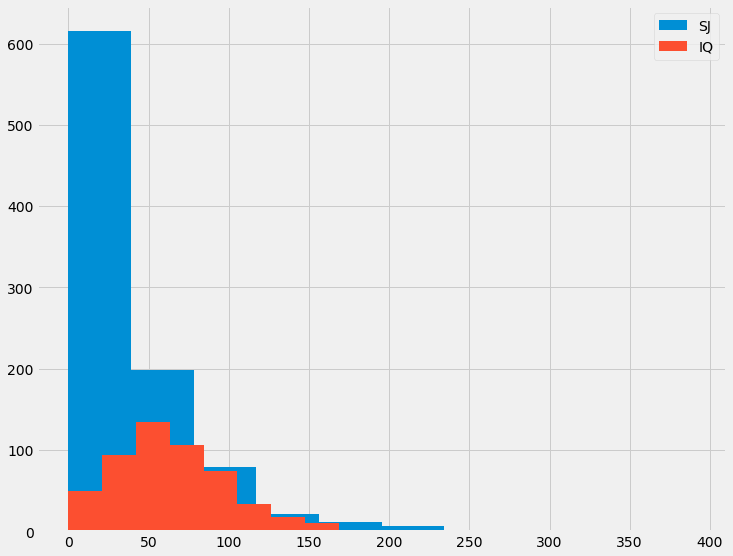

In [63]:
# df_sj.ndvi_ne.plot.hist()
from matplotlib import pyplot
# feature = 'precipitation_amt_mm'
# bins = np.linspace(min(df_sj[feature].min(),df_iq[feature].min(),0), max(df_sj[feature].max(),df_iq[feature].max(),0), 100)
pyplot.hist(df_sj[feature], label='SJ')
pyplot.hist(df_iq[feature], label='IQ')
pyplot.legend(loc='upper right')
pyplot.show()

## Correlation

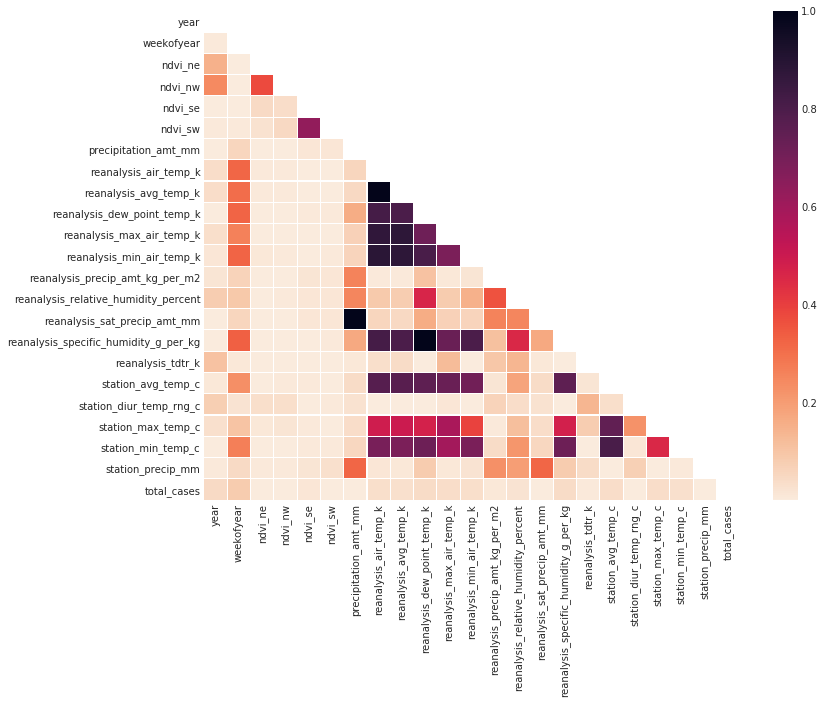

In [9]:
# San Juan
plt.figure(figsize=(12, 9))

corr_sj = df_sj.corr()**2
mask_sj = np.zeros_like(corr_sj)
mask_sj[np.triu_indices_from(mask_sj)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_sj, mask=mask_sj, linewidth=.08, cmap=sns.cm.rocket_r)

In [10]:
def corr_analysis(city):
    # Checking the correlation with total_cases for San Juan
    # ndvi
    print ("ndvi")
    print("Correlation between ndvi_ne and total_cases = " + str(city['ndvi_ne'].corr(city['total_cases'])))
    print("Correlation between ndvi_nw and total_cases = " + str(city['ndvi_nw'].corr(city['total_cases'])))
    print("Correlation between ndvi_se and total_cases = " + str(city['ndvi_se'].corr(city['total_cases'])))
    print("Correlation between ndvi_sw and total_cases = " + str(city['ndvi_sw'].corr(city['total_cases'])))
    print ("\n")
    # Despite the sign, best corr is from 'ndvi_se'
    # 1. Since there is a good corr between ndvi_se and ndvi_sw --> ndvi_sw can be dropped
    # 2. ndvi_nw and ndvi_ne has a good corr. Since ndvi_nw shows a better corr with total cases --> ndvi_ne can be dropped
    # columns going to select --> ndvi_se and ndvi_nw

    # precipitation
    print ("precipitation")
    print("Correlation between precipitation_amt_mm and total_cases = " + str(city['precipitation_amt_mm'].corr(city['total_cases'])))
    print ("\n")
    # corr(reanalysis_sat_precip_amt_mm) = corr(precipitation_amt_mm)
    # no need to select this column according to the below section

    # reanalysis
    print ("reanalysis")
    print("Correlation between reanalysis_air_temp_k and total_cases                 = " + str(city['reanalysis_air_temp_k'].corr(city['total_cases'])))
    print("Correlation between reanalysis_avg_temp_k and total_cases                 = " + str(city['reanalysis_avg_temp_k'].corr(city['total_cases'])))
    print("Correlation between reanalysis_dew_point_temp_k and total_cases           = " + str(city['reanalysis_dew_point_temp_k'].corr(city['total_cases'])))
    print("Correlation between reanalysis_max_air_temp_k and total_cases             = " + str(city['reanalysis_max_air_temp_k'].corr(city['total_cases'])))
    print("Correlation between reanalysis_min_air_temp_k and total_cases             = " + str(city['reanalysis_min_air_temp_k'].corr(city['total_cases'])))
    print("Correlation between reanalysis_precip_amt_kg_per_m2 and total_cases       = " + str(city['reanalysis_precip_amt_kg_per_m2'].corr(city['total_cases'])))
    print("Correlation between reanalysis_relative_humidity_percent and total_cases  = " + str(city['reanalysis_relative_humidity_percent'].corr(city['total_cases'])))
    print("Correlation between reanalysis_sat_precip_amt_mm and total_cases          = " + str(city['reanalysis_sat_precip_amt_mm'].corr(city['total_cases'])))
    print("Correlation between reanalysis_specific_humidity_g_per_kg and total_cases = " + str(city['reanalysis_specific_humidity_g_per_kg'].corr(city['total_cases'])))
    print("Correlation between reanalysis_tdtr_k and total_cases                     = " + str(city['reanalysis_tdtr_k'].corr(city['total_cases'])))
    print("\n")
    # According the above heat map there is good corr between 
    # reanalysis_air_temp_k, reanalysis_avg_temp_k, reanalysis_dew_point_temp_k, 
    # reanalysis_max_air_temp_k, and reanalysis_min_air_temp_k. Therefore highest corr among them is selected.
    # columns going to select --> reanalysis_dew_point_temp_k
    # Even reanalysis_specific_humidity_g_per_kg shows a great corr with total cases it also shows a great corr with the
    # above selected column which is 'reanalysis_dew_point_temp_k'. 
    # But corr(reanalysis_specific_humidity_g_per_kg) > corr(reanalysis_dew_point_temp_k)
    # Therefore reanalysis_specific_humidity_g_per_kg is selected

    # ndvi
    print ("station")
    print("Correlation between station_avg_temp_c and total_cases      = " + str(city['station_avg_temp_c'].corr(city['total_cases'])))
    print("Correlation between station_diur_temp_rng_c and total_cases = " + str(city['station_diur_temp_rng_c'].corr(city['total_cases'])))
    print("Correlation between station_max_temp_c and total_cases      = " + str(city['station_max_temp_c'].corr(city['total_cases'])))
    print("Correlation between station_min_temp_c and total_cases      = " + str(city['station_min_temp_c'].corr(city['total_cases'])))
    print("Correlation between station_precip_mm and total_cases       = " + str(city['station_precip_mm'].corr(city['total_cases'])))
    print ("\n")

In [11]:
# Checking the correlation with total_cases for San Juan
corr_analysis(df_sj)

# ndvi
# Despite the sign, best corr is from 'ndvi_se'
# 1. Since there is a good corr between ndvi_se and ndvi_sw --> ndvi_sw can be dropped
# 2. ndvi_nw and ndvi_ne has a good corr. Since ndvi_nw shows a better corr with total cases --> ndvi_ne can be dropped
# columns going to select --> ndvi_se and ndvi_nw

# precipitation
# corr(reanalysis_sat_precip_amt_mm) = corr(precipitation_amt_mm)
# no need to select this column according to the below section

# reanalysis
# According the above heat map there is good corr between 
# reanalysis_air_temp_k, reanalysis_avg_temp_k, reanalysis_dew_point_temp_k, 
# reanalysis_max_air_temp_k, and reanalysis_min_air_temp_k. Therefore highest corr among them is selected.
# columns going to select --> reanalysis_dew_point_temp_k
# Even reanalysis_specific_humidity_g_per_kg shows a great corr with total cases it also shows a great corr with the
# above selected column which is 'reanalysis_dew_point_temp_k'. 
# But corr(reanalysis_specific_humidity_g_per_kg) > corr(reanalysis_dew_point_temp_k)
# Therefore reanalysis_specific_humidity_g_per_kg is selected

# station
# select station_avg_temp_c


# Selected columns are,
# ndvi_se
# ndvi_nw
# reanalysis_specific_humidity_g_per_kg
# station_avg_temp_c

ndvi
Correlation between ndvi_ne and total_cases = 0.0041442382863890945
Correlation between ndvi_nw and total_cases = 0.0592078570523398
Correlation between ndvi_se and total_cases = -0.12002352728990046
Correlation between ndvi_sw and total_cases = 0.04105489085179673


precipitation
Correlation between precipitation_amt_mm and total_cases = 0.056942494270618954


reanalysis
Correlation between reanalysis_air_temp_k and total_cases                 = 0.1794017814775464
Correlation between reanalysis_avg_temp_k and total_cases                 = 0.17256852265608782
Correlation between reanalysis_dew_point_temp_k and total_cases           = 0.20108565857597152
Correlation between reanalysis_max_air_temp_k and total_cases             = 0.1926351222723707
Correlation between reanalysis_min_air_temp_k and total_cases             = 0.1855250089795826
Correlation between reanalysis_precip_amt_kg_per_m2 and total_cases       = 0.10659074348147535
Correlation between reanalysis_relative_humidit

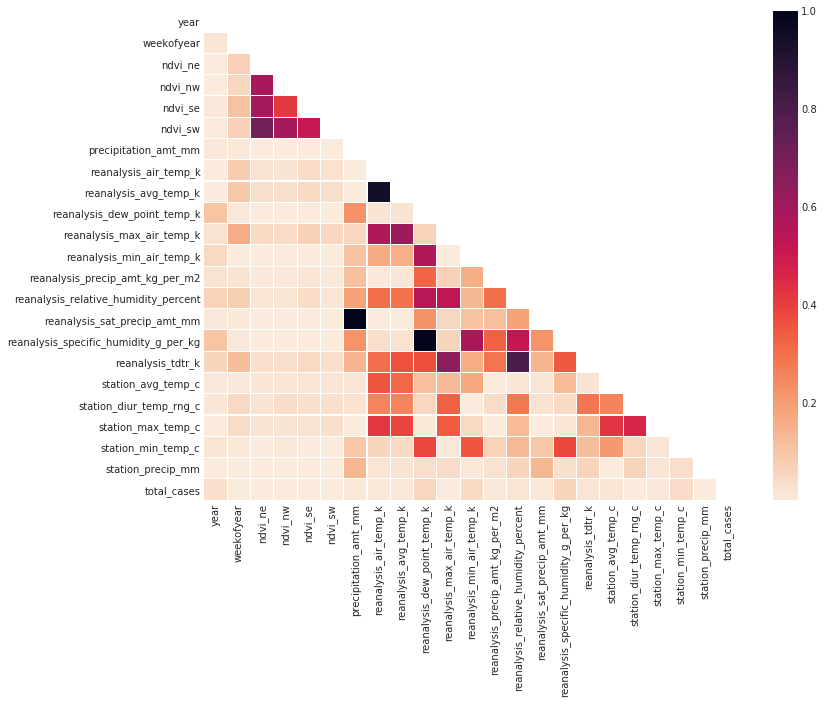

In [12]:
# Iquitos
plt.figure(figsize=(12, 9))

corr_iq = df_iq.corr()**2
mask_iq = np.zeros_like(corr_iq)
mask_iq[np.triu_indices_from(mask_iq)] = True

with sns.axes_style("white"):
    sns.heatmap(corr_iq, mask=mask_iq, linewidth=.08, cmap=sns.cm.rocket_r)

In [13]:
# Checking the correlation with total_cases for Iquitos
corr_analysis(df_iq)
# ndvi
# high corr between each other since ndvi_se shows a high corr to the total_cases
# columns going to select --> ndvi_se 

# precipitation
# corr(reanalysis_sat_precip_amt_mm) = corr(precipitation_amt_mm)
# no need to select this column according to the below section

# reanalysis
# reanalysis_specific_humidity_g_per_kg is selected

# ndvi
# select station_avg_temp_c <-- even station_min_temp_c is the best it shows a good corr between reanalysis_specific_humidity_g_per_kg

# Selected columns are,
# ndvi_se
# reanalysis_specific_humidity_g_per_kg
# station_avg_temp_c



ndvi
Correlation between ndvi_ne and total_cases = 0.019739662629656814
Correlation between ndvi_nw and total_cases = -0.010519633335991306
Correlation between ndvi_se and total_cases = -0.041153446867621526
Correlation between ndvi_sw and total_cases = 0.03136931867100148


precipitation
Correlation between precipitation_amt_mm and total_cases = 0.08941045113267555


reanalysis
Correlation between reanalysis_air_temp_k and total_cases                 = 0.09666581487976969
Correlation between reanalysis_avg_temp_k and total_cases                 = 0.0800557848184904
Correlation between reanalysis_dew_point_temp_k and total_cases           = 0.2288635076436877
Correlation between reanalysis_max_air_temp_k and total_cases             = -0.053157255073872305
Correlation between reanalysis_min_air_temp_k and total_cases             = 0.21085403645637482
Correlation between reanalysis_precip_amt_kg_per_m2 and total_cases       = 0.10068588610348456
Correlation between reanalysis_relative_hu

## Feature Change Over Time

In [14]:
# set index to the dates
df_sj.set_index('week_start_date', drop = True, inplace = True)
df_iq.set_index('week_start_date', drop = True, inplace = True)

In [15]:
# create mean NVDI for each week for each city
df_sj['nvdi_mean'] = df_sj[df_sj.columns[3:7]].mean(axis = 1)
df_iq['nvdi_mean'] = df_iq[df_iq.columns[3:7]].mean(axis = 1)

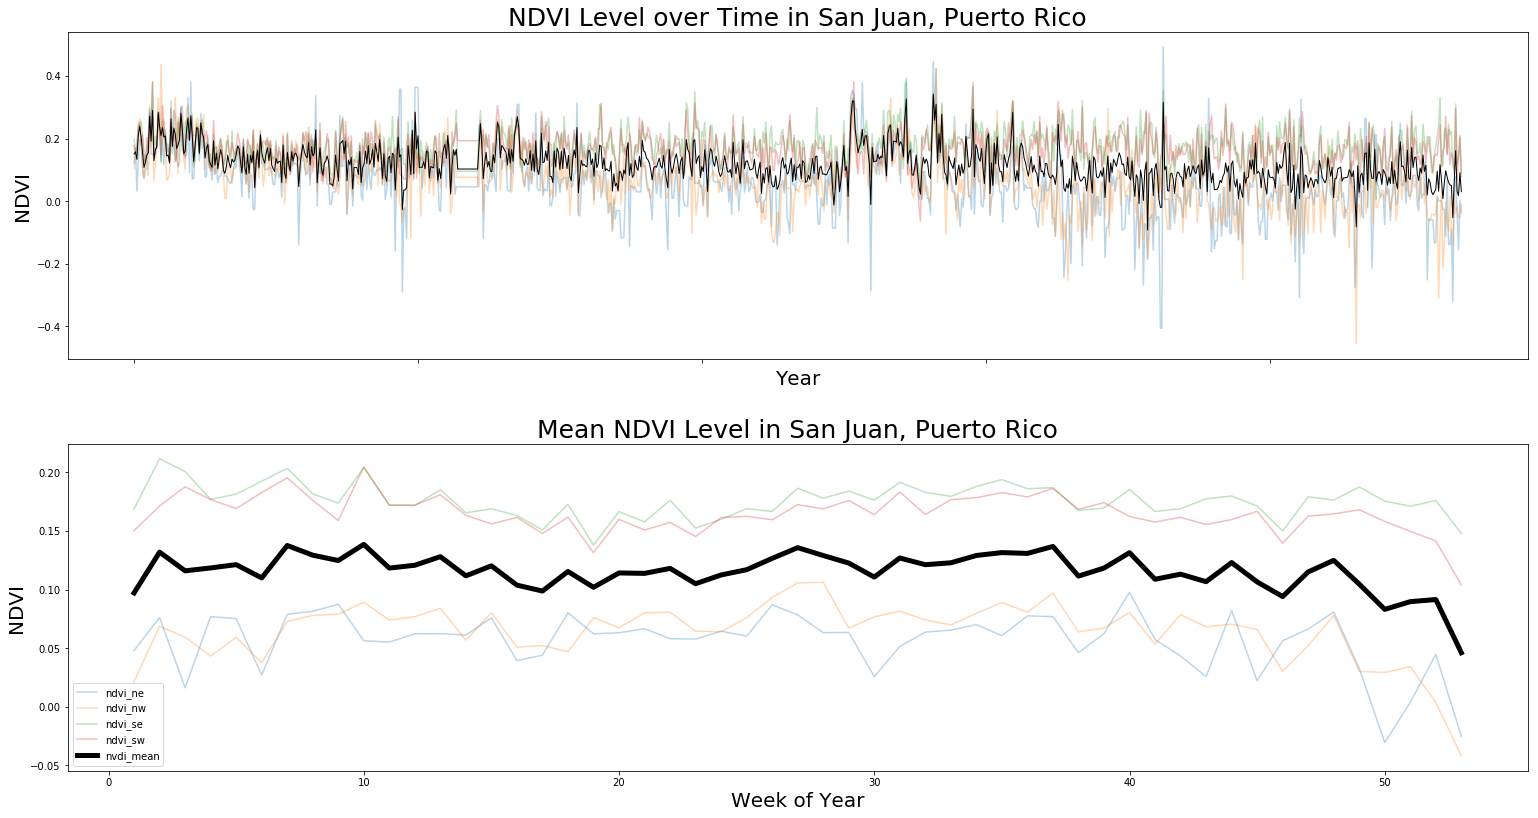

In [16]:
# plot week by week and yearly average for San Juan
fig, ax = plt.subplots(2, 1, figsize=(22, 12))

# top plot
plt.subplot(211)
for i in df_sj.columns[3:7]:
    df_sj[i].plot(alpha = .3)
    
df_sj['nvdi_mean'].plot(alpha = 1, c = 'k', linewidth = 1)
plt.title('NDVI Level over Time in San Juan, Puerto Rico', size = 25)
plt.xlabel('Year', size = 20)
plt.ylabel('NDVI', size = 20)

# bottom plot
plt.subplot(212)
for i in df_iq.columns[3:7]:
    df_sj.groupby('weekofyear')[i].mean().plot(alpha = .3)
    
df_sj.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5)
plt.title('Mean NDVI Level in San Juan, Puerto Rico', size = 25)
plt.xlabel('Week of Year', size = 20)
plt.ylabel('NDVI', size = 20)
plt.legend(loc = 'best')
    
plt.tight_layout(pad=3)

In [17]:
df_iq['year'] = pd.DatetimeIndex(df_iq.index).year # TODO what is the requirement?

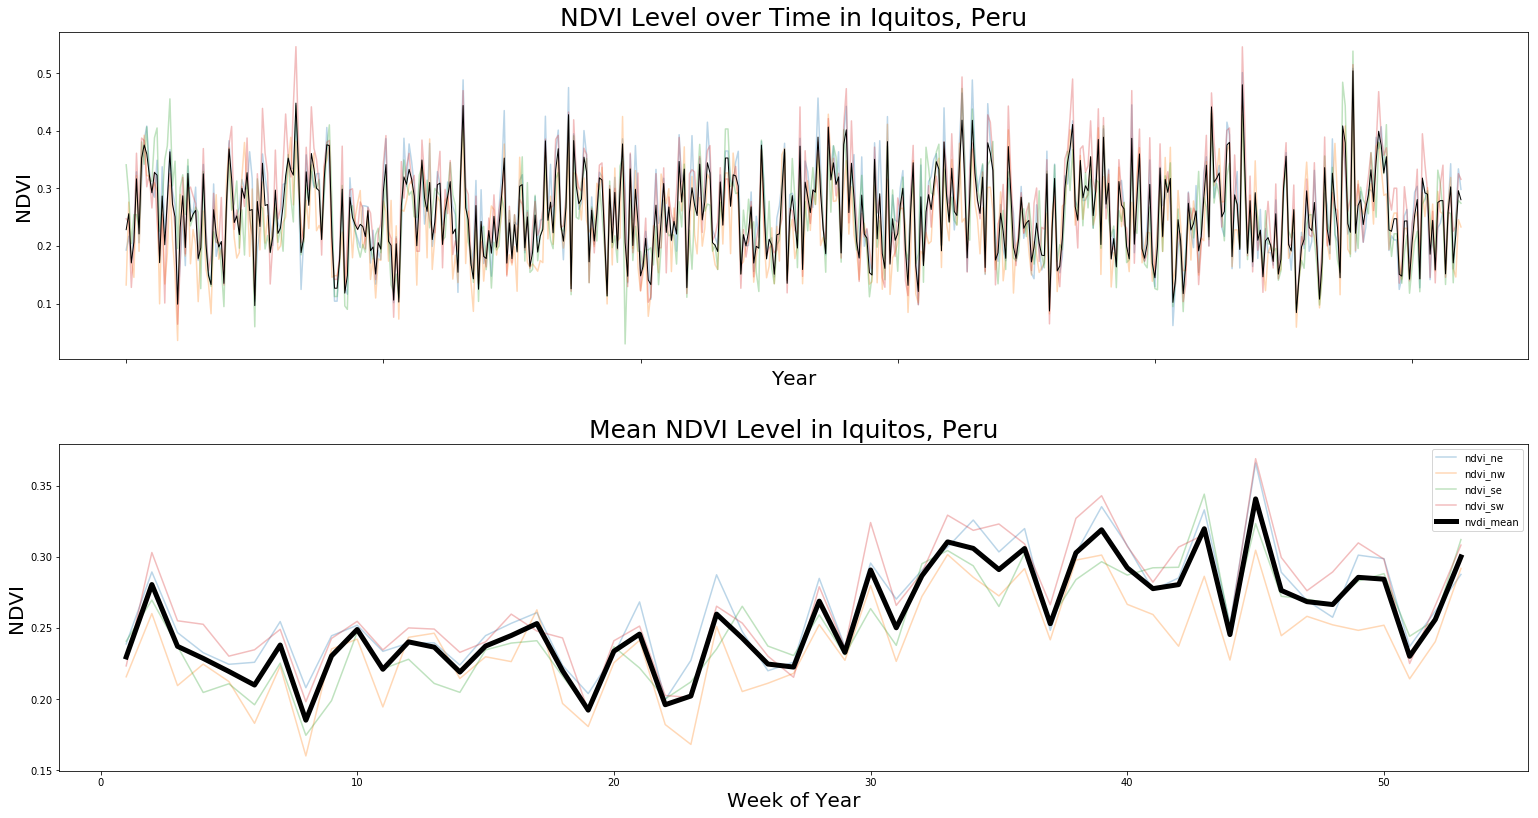

In [18]:
# plot week by week and yearly average for Iquitos
fig, ax = plt.subplots(2, 1, figsize=(22, 12))

#top plot
plt.subplot(211)
for i in df_iq.columns[3:7]:
    df_iq[i].plot(alpha = .3)
df_iq['nvdi_mean'].plot(alpha = 1, c = 'k', linewidth = 1)
plt.title('NDVI Level over Time in Iquitos, Peru', size = 25)
plt.xlabel('Year', size = 20)
plt.ylabel('NDVI', size = 20)

# bottom plot
plt.subplot(212)
for i in df_iq.columns[3:7]:
    df_iq.groupby('weekofyear')[i].mean().plot(alpha = .3)
df_iq.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5)
plt.title('Mean NDVI Level in Iquitos, Peru', size = 25)
plt.xlabel('Week of Year', size = 20)
plt.ylabel('NDVI', size = 20)
plt.legend(loc = 'best')


plt.tight_layout(pad=3)

<b>San Juan</b>: 

* The NVDI scores in the Southwest and Southeast are consistently lower than the scores of the Northwest and Northeast quadrants. 
* In addition, we can see the impact of the front fill method for data imputation. In 1995, there were a few missing rows of NVDI data. The flat line comes from repeating the last known value over and over until an observation was recorded again.

## Weather

In order to visualize weather features of various metrics, we need to standardize them to get rid of the units. Millimeters of rain and degrees Celcius won't look good together.

In [19]:
# Standardize SJ
ss = StandardScaler()
Xs = ss.fit_transform(df_sj[df_sj.columns[7:23]])
df_sj_s = pd.DataFrame(Xs, columns = df_sj.columns[7:23], index=df_sj.index) 
df_sj_s['weekofyear'] = df_sj['weekofyear']

# Standardize IQ
ss = StandardScaler()
Xs = ss.fit_transform(df_iq[df_iq.columns[7:23]])
df_iq_s = pd.DataFrame(Xs, columns = df_iq.columns[7:23], index=df_iq.index)
df_iq_s['weekofyear'] = df_iq['weekofyear']

In [20]:
# see all weather features
df_sj_s.columns[:-1]

Index(['precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

Text(0.5,0,'Week of Year')

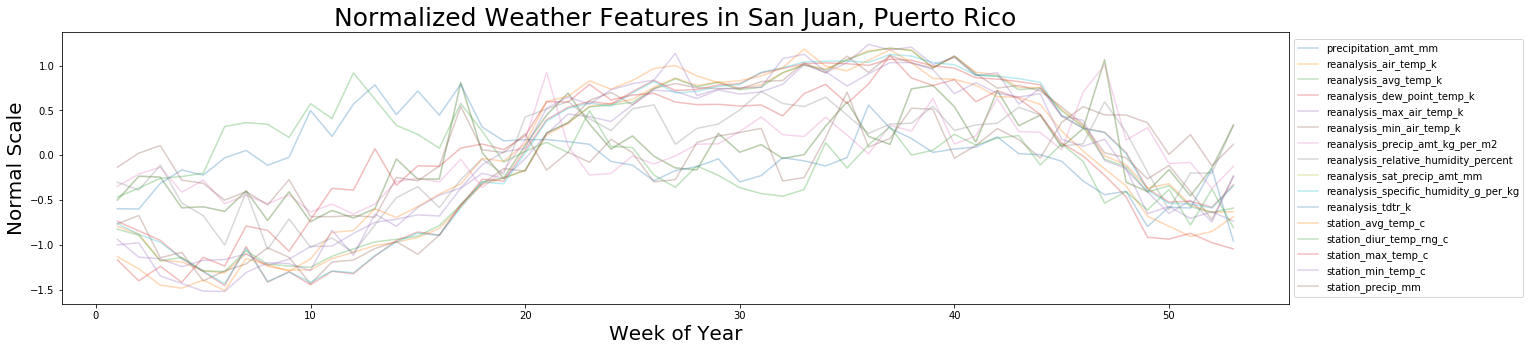

In [21]:
#Plot all Normalized weather data in San Juan

for i in (df_sj_s.columns[:-1]):
    df_sj_s.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('Normalized Weather Features in San Juan, Puerto Rico', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)

Text(0.5,0,'Week of Year')

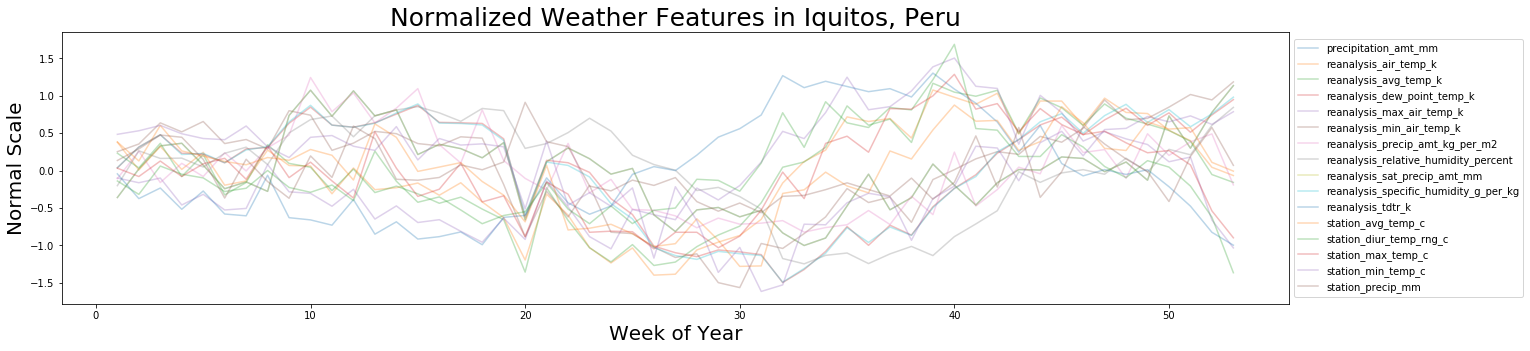

In [22]:
#Plot all Normalized weather data in Iquitos

for i in (df_iq_s.columns[:-1]):
    df_iq_s.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (22, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('Normalized Weather Features in Iquitos, Peru', size = 25)
plt.ylabel('Normal Scale', size = 20)
plt.xlabel('Week of Year', size = 20)

## Weather Conclusions

### Rainfall Measurements
* precipitation_amt_mm
* reanalysis_precip_amt_kg_per_m2
* reanalysis_sat_precip_amt_mm
* station_precip_mm

### Temperature Measurements
* reanalysis_air_temp_k
* reanalysis_avg_temp_k
* reanalysis_dew_point_temp_k
* reanalysis_max_air_temp_k
* reanalysis_min_air_temp_k
* reanalysis_tdtr_k
* station_avg_temp_c
* station_diur_temp_rng_c
* station_max_temp_c
* station_min_temp_c

### Humidity Measurements
* reanalysis_relative_humidity_percent
* reanalysis_specific_humidity_g_per_kg

# --------------------------------------------------------------------------------------------

# ARIMA

In [23]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

In [24]:
# Make the data
df_train = pd.read_csv('./data/train_features.csv',sep=',')
df_labels = pd.read_csv('./data/train_labels.csv',sep=',')
df_test = pd.read_csv('./data/dengue_features_test.csv', sep=',')
df_train['total_cases'] = df_labels['total_cases']


print(df_labels.head(5))
print(df_labels.columns)

  city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6
Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')


In [25]:
df_labels.index = pd.DatetimeIndex(df_train.week_start_date)
# print(df_labels.head())
# Get cases as separately
sj_cases = df_labels[df_labels['city'] == 'sj']
iq_cases = df_labels[df_labels['city'] == 'iq']

# The 'MS' string groups the data in buckets by start of the month
df_labels = df_labels['total_cases'].resample('MS').sum()
sj_cases = sj_cases['total_cases'].resample('MS').sum()
iq_cases = iq_cases['total_cases'].resample('MS').sum()
# The term bfill means that we use the value before filling in missing values
df_labels = df_labels.fillna(df_labels.bfill())
sj_cases = sj_cases.fillna(sj_cases.bfill())
iq_cases = iq_cases.fillna(iq_cases.bfill())

print(df_labels.head(5))
print(sj_cases.head(5))
print(iq_cases.head(5))

week_start_date
1990-04-01     4
1990-05-01    18
1990-06-01    21
1990-07-01    39
1990-08-01    85
Freq: MS, Name: total_cases, dtype: int64
week_start_date
1990-04-01     4
1990-05-01    18
1990-06-01    21
1990-07-01    39
1990-08-01    85
Freq: MS, Name: total_cases, dtype: int64
week_start_date
2000-07-01    0
2000-08-01    0
2000-09-01    1
2000-10-01    2
2000-11-01    0
Freq: MS, Name: total_cases, dtype: int64


## For Both SJ and IQ

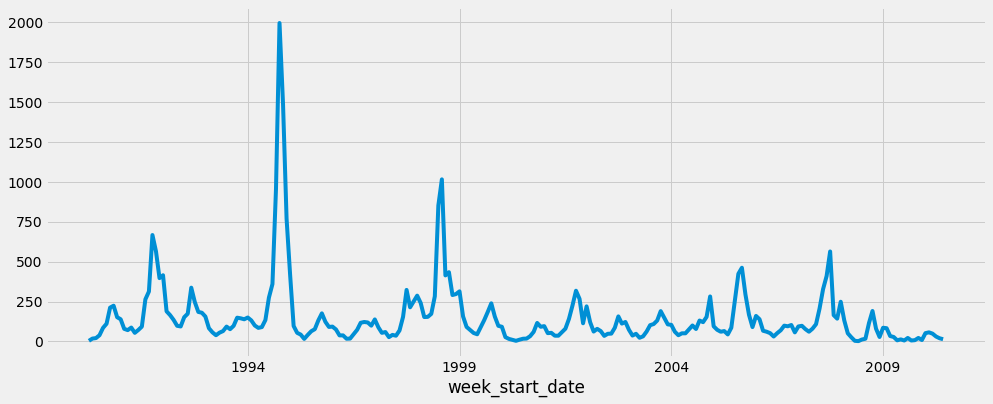

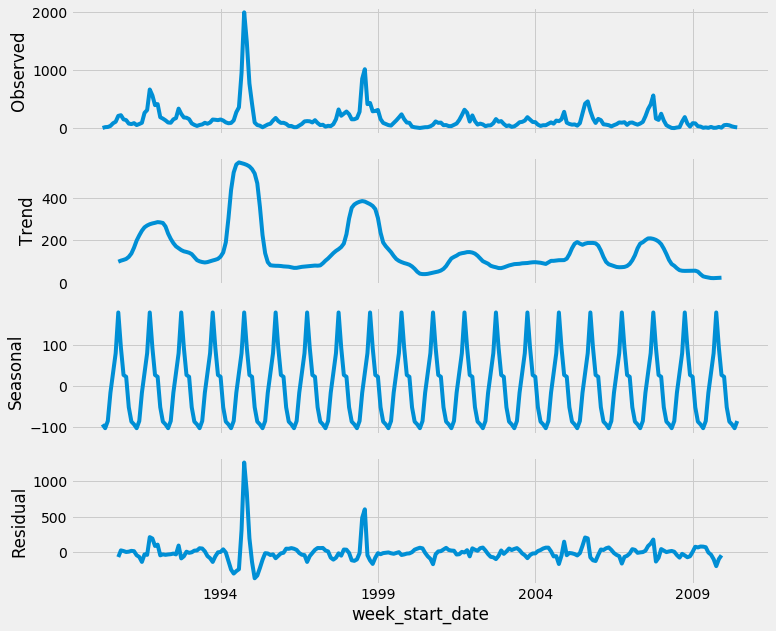

In [26]:
df_labels.plot(figsize=(15, 6))
plt.show()

decomposition = sm.tsa.seasonal_decompose(df_labels, model='additive')
fig = decomposition.plot()
plt.show()

## SJ

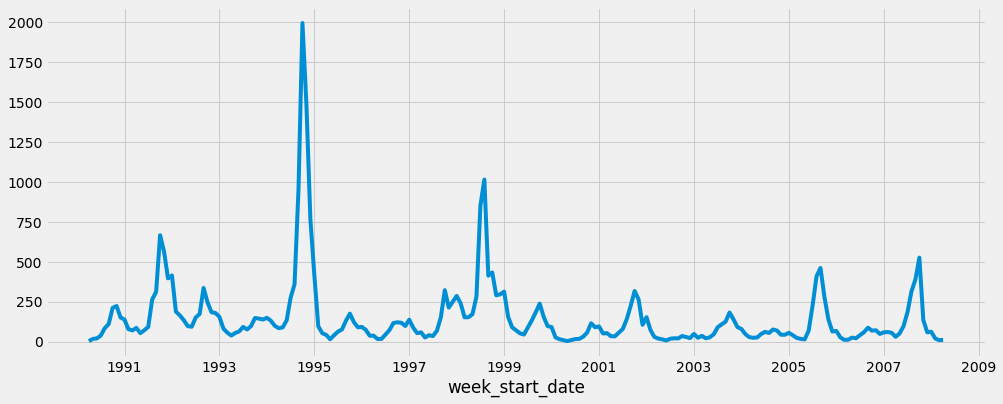

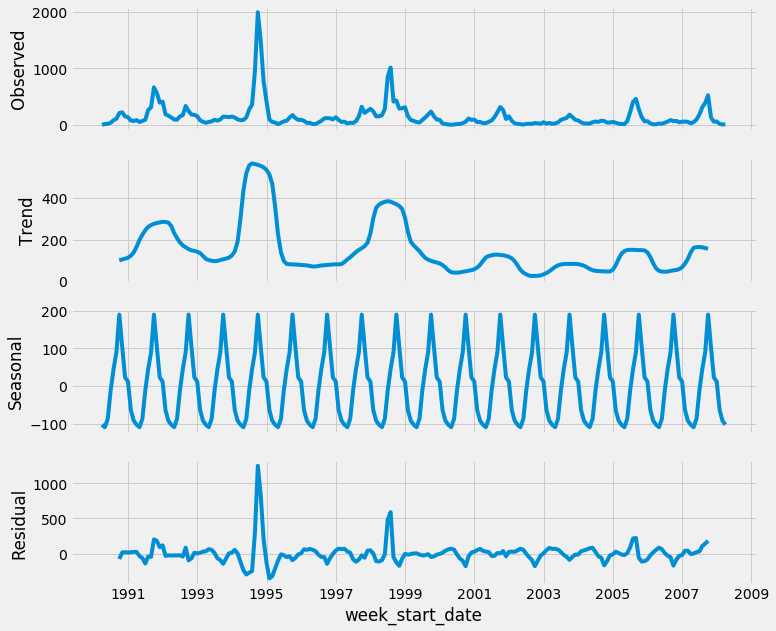

In [27]:
plt.clf()

sj_cases.plot(figsize=(15, 6))
plt.show()

decomposition = sm.tsa.seasonal_decompose(sj_cases, model='additive')
fig = decomposition.plot()
plt.show()

In [28]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [29]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sj_cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3025.2975168155367
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2853.8246032278666
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2919.6948753538054
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2626.264505652346
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2856.232137722992
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2768.4717288476595
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2707.441724872325
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2623.744577564002
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2803.9560165768216
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2645.3854136073
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2721.764708708316
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2448.1717079921564
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2664.7876474285504
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2583.2550776835537
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2541.2684447946367
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2449.2185166420572
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2731.506930590348
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2590.5895976983884
A

In [30]:
mod_sj = sm.tsa.statespace.SARIMAX(sj_cases,
                                order=(1,0,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_sj = mod_sj.fit()
print(results_sj.aic)
print(results_sj.summary().tables[1])

2379.6040201171436
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6477      0.034     18.832      0.000       0.580       0.715
ma.L1          0.5552      0.060      9.186      0.000       0.437       0.674
ma.S.L12      -1.0000      0.050    -19.905      0.000      -1.099      -0.902
sigma2       1.26e+04   3.99e-06   3.16e+09      0.000    1.26e+04    1.26e+04


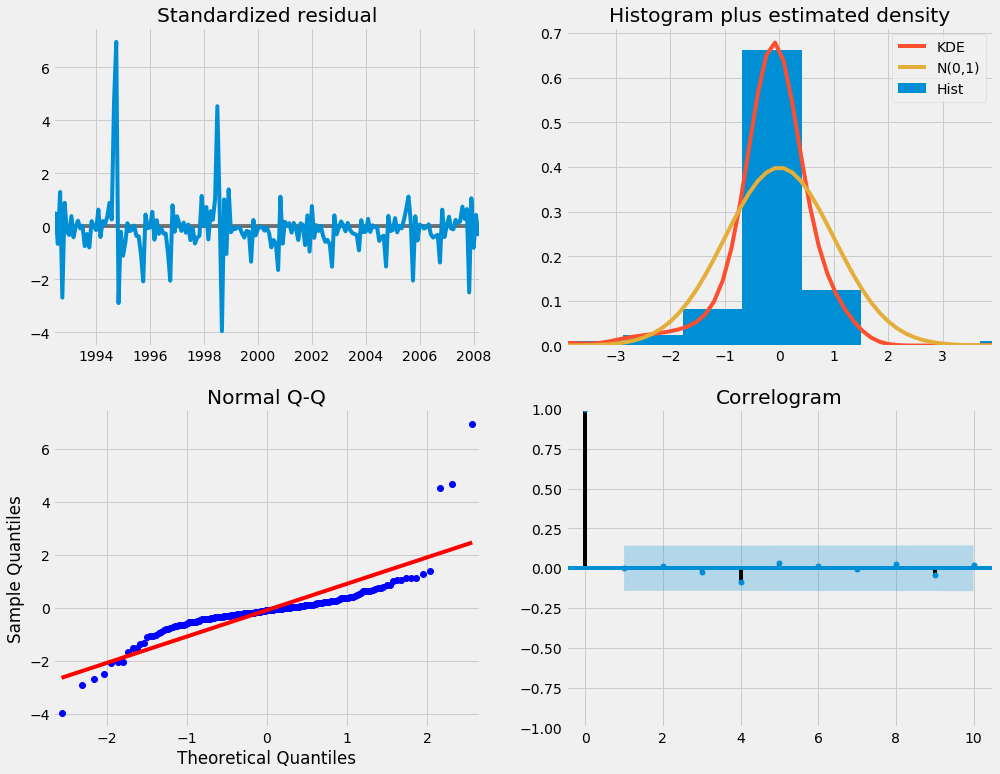

In [31]:
results_sj.plot_diagnostics(figsize=(15, 12))
plt.show()

In [32]:
pred_sj = results_sj.get_prediction(start=pd.to_datetime('2005-01-01'), dynamic=False)
pred_ci_sj = pred_sj.conf_int()

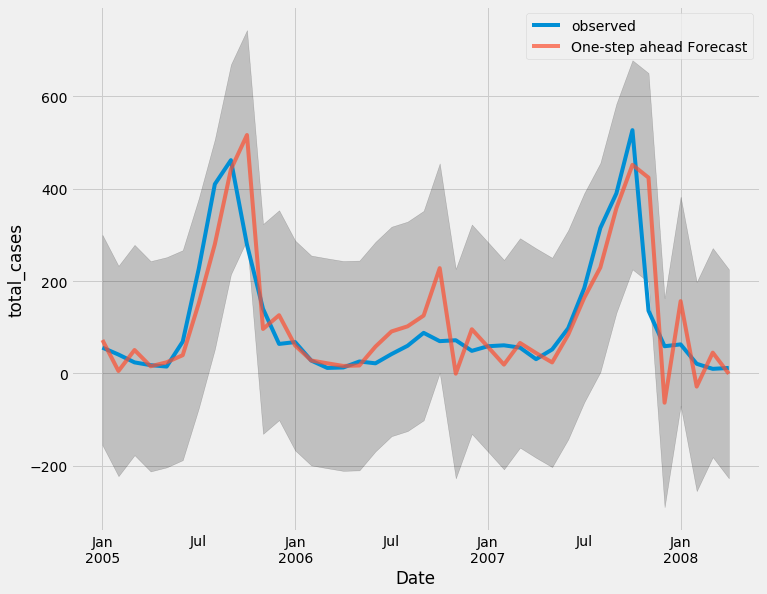

In [33]:
ax = sj_cases['2005':].plot(label='observed')
pred_sj.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci_sj.index,
                pred_ci_sj.iloc[:, 0],
                pred_ci_sj.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('total_cases')
plt.legend()

plt.show()

In [34]:
y_forecasted_sj = pred_sj.predicted_mean
y_truth_sj = sj_cases['2005-01-01':]

# Compute the mean square error
mse = ((y_forecasted_sj - y_truth_sj) ** 2).mean()
print('The Mean Squared Error of SJ forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of SJ forecasts is 6398.93


In [37]:
pred_dynamic_sj = results_sj.get_prediction(start=pd.to_datetime('2005-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci_sj = pred_dynami_sj.conf_int()

NameError: name 'pred_dynami_sj' is not defined

In [ ]:
ax = sj_cases['2005':].plot(label='observed', figsize=(20, 15))
pred_dynamic_sj.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci_sj.index,
                pred_dynamic_ci_sj.iloc[:, 0],
                pred_dynamic_ci_sj.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2005-01-01'), sj_cases.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('total_cases')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic_sj.predicted_mean
y_truth = sj_cases['2005-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc_sj = results_sj.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci_sj = pred_uc_sj.conf_int()

In [ ]:
ax = sj_cases.plot(label='observed', figsize=(20, 15))
pred_uc_sj.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('total_cases')

plt.legend()
plt.show()

## IQ

In [ ]:
plt.clf()
iq_cases.plot(figsize=(15, 6))
plt.show()

decomposition = sm.tsa.seasonal_decompose(iq_cases, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_labels,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df_labels,
                                order=(4,1,3),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.aic)
print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2008-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [ ]:
ax = df_labels['2008':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('total_cases')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = df_labels['2008-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2008-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
ax = df_labels['2008':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2008-01-01'), df_labels.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('total_cases')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = df_labels['2008-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
ax = df_labels.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('total_cases')

plt.legend()
plt.show()